#### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Reading the Data

In [15]:
data_x = pd.read_csv('linearX.csv', names=['x'])
data_y = pd.read_csv('linearY.csv', names=['y'])

In [16]:
inputs_x = np.array(data_x.x)
targets_y = np.array(data_y.y)

#### Normalization

In [17]:
inputs_x_normalized = (inputs_x - inputs_x.mean()) / inputs_x.std()
targets_y_normalized = (targets_y - targets_y.mean()) / targets_y.std()

#### Cost Function and Batch Gradient Descent functions

In [18]:
def cost_function_J(inputs_x, targets_y, slope_m, intercept_c):
    predictions = slope_m * inputs_x + intercept_c
    return np.mean(np.square(predictions - targets_y)) / 2

In [19]:
def linear_regression(inputs_x, targets_y, learning_rate=1e-3, max_iter=1e+5, tolerance=5e-9):
    slope_m = 1
    intercept_c = 0

    loss = list()
    loss.append(cost_function_J(inputs_x, targets_y, slope_m, intercept_c))

    for iter in range(int(max_iter)):
        
        predictions = slope_m * inputs_x + intercept_c

        dJ_dm = np.mean((predictions - targets_y) * inputs_x)
        dJ_dc = np.mean(predictions - targets_y)

        slope_m -= learning_rate * dJ_dm
        intercept_c -= learning_rate * dJ_dc

        loss.append(cost_function_J(inputs_x, targets_y, slope_m, intercept_c))

        if abs(loss[-2] - loss[-1]) < tolerance:
            break

    return slope_m, intercept_c, loss

#### 1. (a) Use linear regression to fit a straight line to the given database. Set your learning rate to 0.5.

In [20]:
slope_m, intercept_c, loss = linear_regression(inputs_x_normalized, targets_y_normalized, learning_rate=0.5)


#### 1. (b) What are the cost function value and learning parameters values after convergence?

In [21]:
print(f'm = {slope_m:.6f} c = {intercept_c:.6f} loss = {loss[-1]:.6f}')

m = 0.655107 c = -0.000000 loss = 0.285445


#### 1. (c) Also, mention the convergence criteria you used.

Ans. Convergence Criteria: Absolute change in loss in less than 5e-9\
```abs(loss[-2] - loss[-1]) < tolerance``` 

#### 2. What is the advantage of averaging the cost?
```cost = np.mean(np.square(predictions - targets_y)) / 2``` \
<br>
Ans. Averaging the cost ensures that the cost function is not influenced by the number of data points, making it easier to compare models trained on datasets of different sizes.

#### 3. Plot cost function v/s iteration graph for the model in question 1 for first 50 iterations.

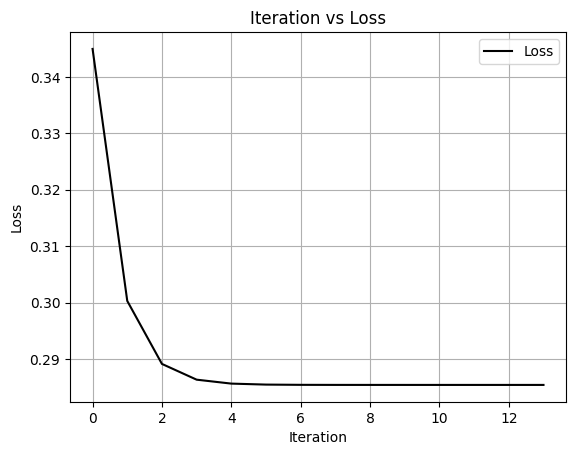

In [22]:
plt.plot(loss[:50], '-', color='black', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss')
plt.grid(True)
plt.legend()
plt.show()

#### 4. Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

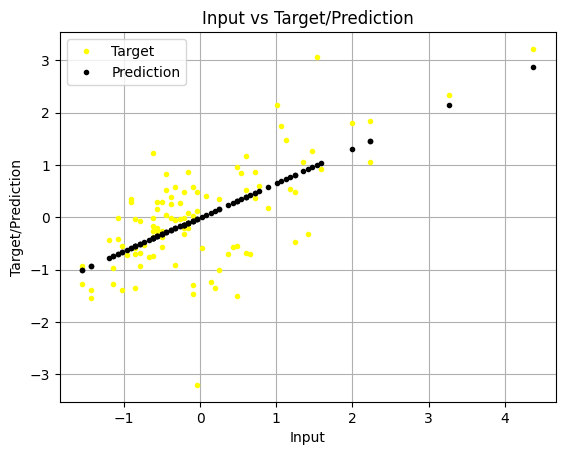

In [23]:
predictions = slope_m * inputs_x_normalized + intercept_c

plt.plot(inputs_x_normalized, targets_y_normalized, '.', color='yellow', label='Target')
plt.plot(inputs_x_normalized, predictions, '.', color='black', label='Prediction')
plt.xlabel('Input')
plt.ylabel('Target/Prediction')
plt.title('Input vs Target/Prediction')
plt.grid(True)
plt.legend()
plt.show()

#### 5. Test your regression model with the learning rates [0.005, 0.5, 5]. For each learning rate, plot a graph showing how the cost function changes for the first 50 iterations and write your observation.

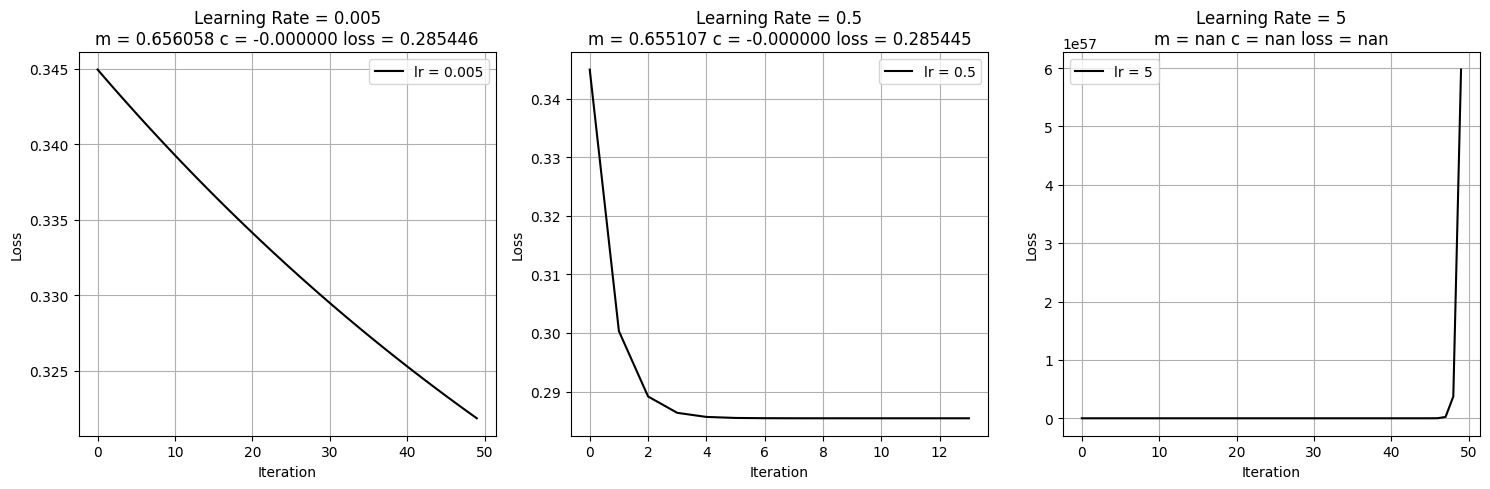

In [24]:
learning_rates = [0.005, 0.5, 5]
plt.figure(figsize=(15, 5))

for i, lr in enumerate(learning_rates):
    slope_m, intercept_c, loss = linear_regression(inputs_x_normalized, targets_y_normalized, learning_rate=lr)
    plt.subplot(1, 3, i + 1)

    plt.plot(loss[:50], '-', color='black', label=f"lr = {lr}")
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Learning Rate = {lr}\nm = {slope_m:.6f} c = {intercept_c:.6f} loss = {loss[-1]:.6f}')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Ans. For lr=5 the training was neumerically unstable (giving NaN error)\
For lr=0.5 and 0.005 the model converged but faster for lr=0.5

#### Stochastic and Mini Batch Gradient Descent Functions

In [25]:
def SGD(inputs_x, targets_y, learning_rate=1e-3, max_iter=1e+5, tolerance=5e-9):
    slope_m = 1
    intercept_c = 0

    m = len(inputs_x)

    loss = list()
    loss.append(cost_function_J(inputs_x, targets_y, slope_m, intercept_c))

    for iter in range(int(max_iter)):

        idx = np.random.randint(m)

        x_i = inputs_x[idx]
        y_i = targets_y[idx]

        prediction = slope_m * x_i + intercept_c

        dJ_dm = np.mean((prediction - y_i) * x_i)
        dJ_dc = np.mean(prediction - y_i)

        slope_m -= learning_rate * dJ_dm
        intercept_c -= learning_rate * dJ_dc

        loss.append(cost_function_J(inputs_x, targets_y, slope_m, intercept_c))

        if abs(loss[-2] - loss[-1]) < tolerance:
            break

    return slope_m, intercept_c, loss

def MBGD(inputs_x, targets_y, batch_size= 32, learning_rate=1e-3, max_iter=1e+5, tolerance=5e-9):
    slope_m = 1
    intercept_c = 0

    m = len(inputs_x)

    loss = list()
    loss.append(cost_function_J(inputs_x, targets_y, slope_m, intercept_c))

    for iter in range(int(max_iter)):

        indexes = np.random.choice(range(m), batch_size, replace=False)

        x_batch = inputs_x[indexes]
        y_batch = targets_y[indexes]

        prediction = slope_m * x_batch + intercept_c

        dJ_dm = np.mean((prediction - y_batch) * x_batch)
        dJ_dc = np.mean(prediction - y_batch)

        slope_m -= learning_rate * dJ_dm
        intercept_c -= learning_rate * dJ_dc

        loss.append(cost_function_J(inputs_x, targets_y, slope_m, intercept_c))

        if abs(loss[-2] - loss[-1]) < tolerance:
            break

    return slope_m, intercept_c, loss

#### 6. Choose a suitable learning rate, then implement stochastic and min-batch gradient descent, plot the cost function against iteration, and observe how your cost function changes compared to batch gradient descent.

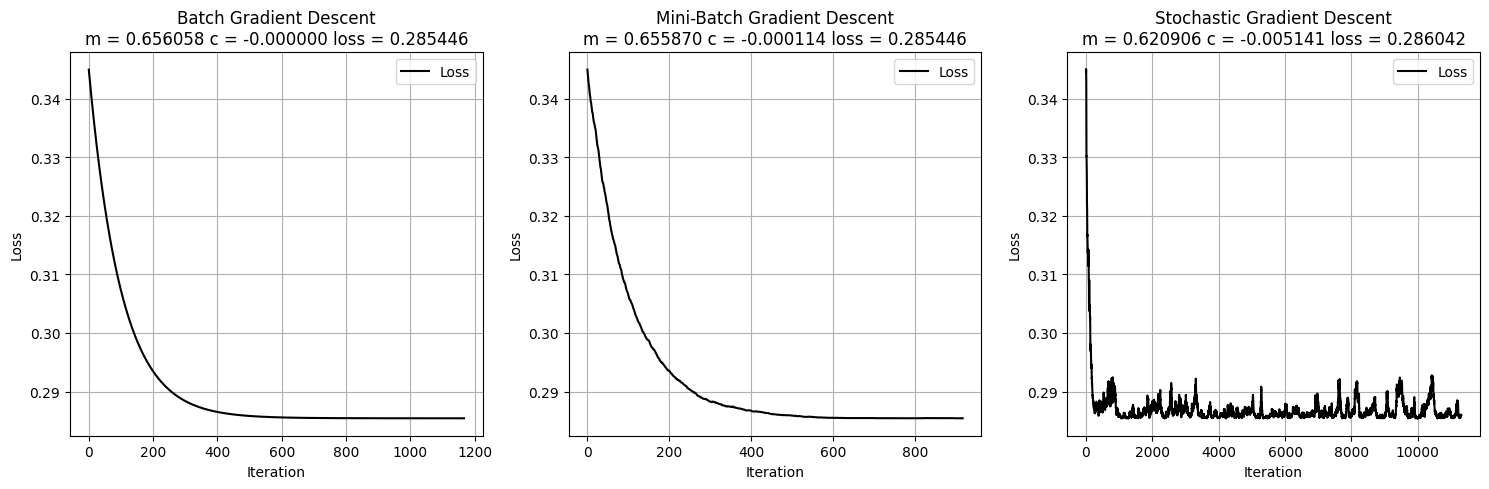

In [26]:
gradient_descents = {
    'Batch Gradient Descent': linear_regression,
    'Mini-Batch Gradient Descent': MBGD,
    'Stochastic Gradient Descent': SGD
}

plt.figure(figsize=(15, 5))

for i, (gradient_descent, func) in enumerate(gradient_descents.items()):
    slope_m, intercept_c, loss = func(inputs_x_normalized, targets_y_normalized, learning_rate=0.005)
    plt.subplot(1, 3, i + 1)

    plt.plot(loss, '-', color='black', label=f"Loss")
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(gradient_descent + f'\nm = {slope_m:.6f} c = {intercept_c:.6f} loss = {loss[-1]:.6f}')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()